In [5]:
#example of creating matrices with numpy

import numpy as np
x = np.array([[2.5, 3.2],[0, 1],[2, -3]], dtype=np.float32) #dtype is specifying the format of the elements stored in the matrix
print(x)
print(f"Shape: {x.shape}") #num rows, num cols
print(f"Number of dimensions: {x.ndim}") #it is a matrix with rows and cols, so 2
print(f"Number of elements: {x.size}")


[[ 2.5  3.2]
 [ 0.   1. ]
 [ 2.  -3. ]]
Shape: (3, 2)
Number of dimensions: 2
Number of elements: 6


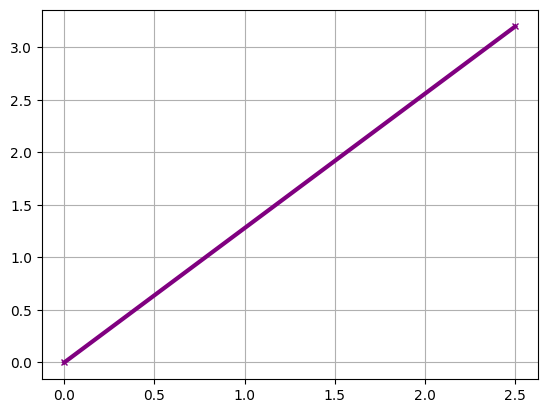

In [6]:
#let's try to plot a vector
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

v = np.array([2.5, 3.2])
plt.plot([0, v[0]],[0, v[1]], 
        marker = 'x', color = 'purple', lw = 3, 
        markersize = 5)  #starting from X, then Y (coordinates)
plt.grid()


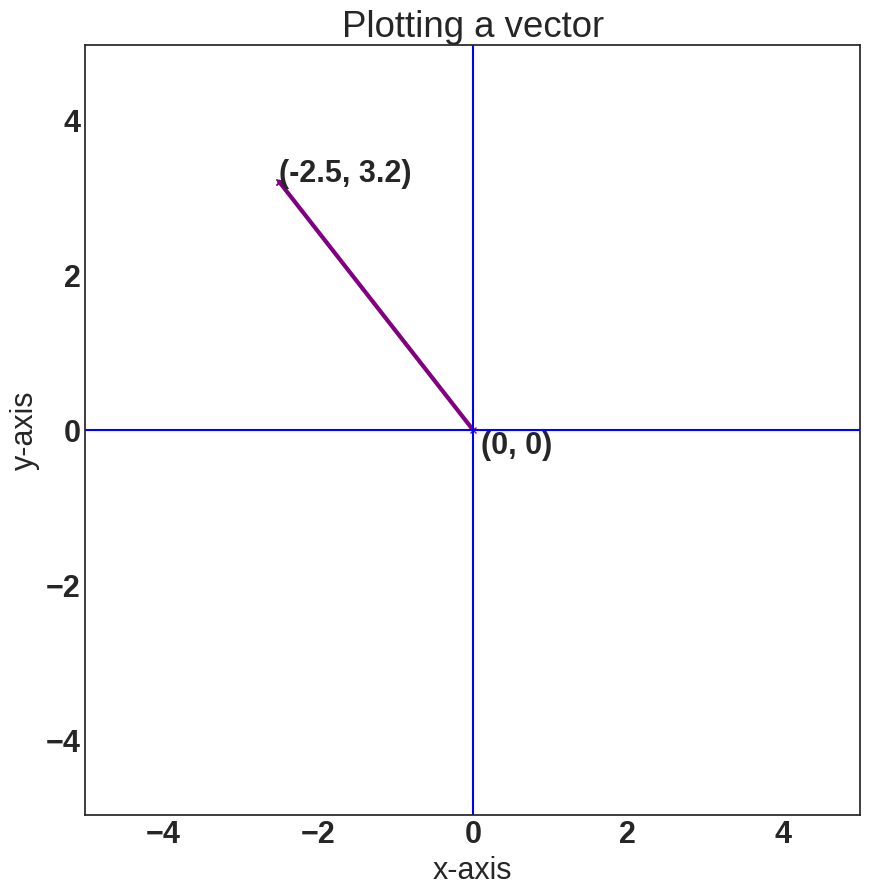

In [7]:
#fancier way to plot the vector v
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  
#above allows plots to be displayed directly in the notebook

v = np.array([-2.5, 3.2])

plt.style.use('seaborn-v0_8-white')
font = { 'family': 'sans-serif',
    'weight': 'bold',
    'size': 22}
matplotlib.rc('font', **font) #set the font properties from the dict

#plotting:
plt.figure(figsize =(10,10)) #size of the image 
plt.plot(v[0], v[1], marker = 'x', color = 'purple', lw = 3, markersize = 5)
#all the X first, then the Y
plt.plot([0, v[0]],[0, v[1]], marker = 'x', color = 'purple', lw = 3, markersize = 5)
#stuff:
plt.axis('equal') #sets the aspect ration of the plot to be equal
#label axes
plt.xlabel('x-axis')
plt.ylabel('y-axis')
#add horizontal and vertical lines through the origin
plt.axhline(0, color = 'blue')
plt.axvline(0, color = 'blue')
#title of the plot
plt.title('Plotting a vector')
#annotate the origin and the point represented by the vector
plt.annotate('(0, 0)', xy=(0, 0), xytext = (.1, -.3))
plt.annotate(f'({v[0]}, {v[1]})', xy =(v[0], v[1]), xytext=(v[0], v[1]))
#limits of the axes
plt.axis([-5, 5, -5, 5])
plt.show()

In [8]:
#diagonal matrix 
import numpy as np
A = np.diag(np.ones(3)) #first creates a vector [1, 1, 1]
                        #and then makes it a diagonal matrix
print(A)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [9]:
#is ID symmetric?
import numpy as np
ID = np.diag(np.ones(3))
#if you don't add np.all() you get a matrix of the checks 
np.all(ID==ID.T) # == does the comparison element-wise
#ID == ID.T


True

In [11]:
#Generate an array from 0 to 8 of int64
#reshape it into a 3x3 matrix
import numpy as np
A = np.arange(9).reshape(3, 3)
print(f"A is \n {A}", end = '\n' * 2)
print(f'The transpose of A is: {A.T}', end = '\n' * 2)
print(f'A is of type {A.dtype}')

A is 
 [[0 1 2]
 [3 4 5]
 [6 7 8]]

The transpose of A is: [[0 3 6]
 [1 4 7]
 [2 5 8]]

A is of type int64


In [13]:
#Reduction operations: sum across rows
import numpy as np
A = np.arange(9).reshape(3, 3)

A_c = A.sum(axis = 0, keepdims = False)  #3 (rows canceled out)
A_c.shape
print(A_c)

#works for other operations too like the mean:
A.mean(axis = 0, keepdims = False)

[ 9 12 15]


array([3., 4., 5.])

Generally operations are element-wise:
                $$
                C_{ij} = A_{ij} + B_{ij}
                $$

In [14]:
A = np.arange(9).reshape(3, 3)
B = np.ones_like(A)
C = A + B
print('C', C , 'A', A, 'B', B , sep ='\n\n')
np.allclose(C, A + 1)  # you can sum matrix + scalar, numpy will broadcast
# all.close(): Returns True if two arrays are element-wise equal within a tolerance.

C

[[1 2 3]
 [4 5 6]
 [7 8 9]]

A

[[0 1 2]
 [3 4 5]
 [6 7 8]]

B

[[1 1 1]
 [1 1 1]
 [1 1 1]]


True

In [18]:
#Reduction operations: sum across columns
import numpy as np
A = np.arange(9).reshape(3, 3)
A.sum(axis = (0, 1), keepdims= False)


36

In [19]:
#Inner Product
import numpy as np

x = np.array([1, 2, 3])
y = np.array([1, 0, 1])
np.dot(x, y) == np.sum(x * y)


True

In [2]:
#The angle between 2 vectors is the geometric interpretation of the dot product
import numpy as np
def angle(v, w):
    return np.arccos(v.dot(w) / (np.linalg.norm(v) * np.linalg.norm(w)))
angle(np.array([0, 1, 2]), np.array([2, 3, 4]))

#cosine similarity
def cos_sim(v, w):
    return np.cos(v.dot(w) / (np.linalg.norm(v) * np.linalg.norm(w)))
cos_sim(np.array([0, 1, 2]), np.array([2, 3, 4]))

0.6109785124651403

In [4]:
#Outer product
import numpy as np
x = np.array([1, 2, 3])
y = np.array([1, 0, 1, -1])

np.outer(y, x)

array([[ 1,  2,  3],
       [ 0,  0,  0],
       [ 1,  2,  3],
       [-1, -2, -3]])

In [ ]:
#Moving points in space:
import numpy as np
A = np.arange(27).reshape(3, 9)
x = np.ones((9, 1))
b = A @ x #3x9 @ 9x1 = 3x1
b1 = np.matmul(A, x)
b2 = np.dot(A, x)

print( 'A', A, 'x', x, 'b', b, 'b1', b1, 'b2', b2, sep='\n\n')

In [2]:
import numpy as np
A = np.random.rand(3, 5)
B = np.random.rand(5, 3)
C = A @ B
print(C)

[[1.07290279 1.07870358 0.82960805]
 [1.05649256 0.86235138 0.97349997]
 [0.84057944 1.14679892 0.4854864 ]]
